# Task 1: Binary Represnetations


 *An unsigned integer is a 32-bit datum that encodes a nonnegative integer in the range [0 to 4294967295].

### Left Rotation 
`rotl` rotates the bits in a 32-bit unsigned integer `x` to the left by `n` places.

In [6]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 3.2 Operations on Words

def rotl(x, n=1):

    # This is to ensure x is a 32-bit unsigned integer
    x = x & 0xFFFFFFFF 

    #This is to ensure n is within the range of 0 to 31
    n = n % 32
    
    return ((x << n) | (x >> (32 - n))) & 0xFFFFFFFF # Return the result of rotationg x left by n bits

### Example:

In [7]:
# Left rotation 
x = 5
print(format(x, '032b')) # 5 in 32 bits

# Rotate 5 to the left by 1
print(format(rotl(x), '032b'))

00000000000000000000000000000101
00000000000000000000000000001010


### Right Rotation
`rotr` rotates the bits in a 32-bit unsigned integer `x` to the right `n` places.

In [8]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 3.2 Operations on Words

def rotr(x, n=1):
    
    # This is to ensure x is a 32-bit unsigned integer
    x = x & 0xFFFFFFFF 

    #This is to ensure n is within the range of 0 to 31
    n = n % 32
    return ((x >> n) | (x << (32 - n))) & 0xFFFFFFFF # Return the result of rotationg x right

### Example:

In [9]:
x = 2
print(format(x, '032b')) # 2 in 32 bits

# Rotate 2 to the right by 1
print(format(rotr(x), '032b'))

00000000000000000000000000000010
00000000000000000000000000000001


### Choice Function (ch)
The `ch(x,y,z)` function choose bits from `y` where `x` is 1, and bits from `z` where `x` is 0.

Formula: `ch(x,y,z) = (x & y) ^ (~x & z)`

In [10]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 4.1.1 SHA-1 Functions
def ch(x, y, z):
    
    # Is to ensure all inputs are 32-bit unsigned integers
    x = x & 0xFFFFFFFF # selector
    y = y & 0xFFFFFFFF
    z = z & 0xFFFFFFFF

    return ((x & y) ^ (~x & z)) & 0xFFFFFFFF # Return the result of the choice function

#### Pattern 1
Hex: `0xFF00FF00`  
Binary: `11111111 00000000 11111111 00000000`

#### Pattern 2
Hex: `0xAAAAAAAA`  
Binary: `10101010 10101010 10101010 10101010`

#### Pattern 3
Hex: `0x55555555`  
Binary: `01010101 01010101 01010101 01010101

In [11]:
x = 0xFF00FF00  # Pattern of 1s and 0s
y = 0xAAAAAAAA  # Pattern for bits selected by 1s in x
z = 0x55555555  # Pattern for bits selected by 0s in x

result = ch(x, y, z)
print(f"x: {format(x, '032b')}")
print(f"y: {format(y, '032b')}")
print(f"z: {format(z, '032b')}")
print(f"r: {format(result, '032b')}")

x: 11111111000000001111111100000000
y: 10101010101010101010101010101010
z: 01010101010101010101010101010101
r: 10101010010101011010101001010101


### Majority Function (maj)
The `maj(x,y,z)` function performs a bitwise majority vote. For each bit position, the output is 1 if at least two of the corresponding bits in x, y, and z are 1.

Formula: `maj(x,y,z) = (x & y) ^ (x & z) ^ (y & z)`

In [12]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 4.1.1 SHA-1 Functions
def maj(x, y, z):
    # Ensure all inputs are 32-bit unsigned integers
    x = x & 0xFFFFFFFF
    y = y & 0xFFFFFFFF
    z = z & 0xFFFFFFFF
    
    return ((x & y) ^ (x & z) ^ (y & z)) & 0xFFFFFFFF

In [13]:
# Test maj function with the same patterns as ch
x = 0xFF00FF00  # Pattern 1
y = 0xAAAAAAAA  # Pattern 2
z = 0x55555555  # Pattern 3

result = maj(x, y, z)
print(f"x: {format(x, '032b')}")
print(f"y: {format(y, '032b')}")
print(f"z: {format(z, '032b')}")
print(f"r: {format(result, '032b')}")

x: 11111111000000001111111100000000
y: 10101010101010101010101010101010
z: 01010101010101010101010101010101
r: 11111111000000001111111100000000


# Task 2: Hash Functions

In this task, I've implemented the hash function from *The C Programming Language* by Brian Kernighan and Dennis Ritchie (K&R), converting it from C to Python.

### Implementation Details

The original C function:
```c
unsigned hash(char *s) {
    unsigned hashval;
    for (hashval = 0; *s != '\0'; s++)
        hashval = *s + 31 * hashval;
    return hashval % 101;
}

In [14]:
"""
This function converts a string to an integer hash value using a polynomial rolling hash technique.
Args: s (str): Input string to be hashed
Returns: int: Hash value between 0 and 100 (inclusive)
"""
def hash_function(s):
    hashval = 0
    # Iterate through each character in the string
    for char in s:
        # Update hash by multiplying previous value by 31 and adding ASCII value of current character
        hashval = ord(char) + 31 * hashval
    # Take modulo 101 to keep the hash value within a fixed range
    return hashval % 101

# Test with the string "hello"
print(hash_function("hello"))    

17


**Why 31 and 101?**
1. **The Multiplier (31)**:
    - 31 is a prime number, which helps in distributing hash values more uniformly
    - It's close to a power of 2 (32 = 2⁵), which makes multiplication efficient: `31 * n = (32 * n) - n = (n << 5) - n`
    - Empirical tests have shown that 31 produces fewer collisions compared to other small integers
    - This number has become a de facto standard in many hash implementations (e.g., Java's `String.hashCode()`)

2. **The Modulus (101)**:
    - 101 is a prime number, which helps in creating a more uniform distribution of hash values
    - Using a prime modulus reduces the chance of systematic patterns causing collisions
    - The value 101 creates a hash table of reasonable size (101 buckets) for the original use case in K&R
    - Prime moduli generally provide better distribution properties than composite numbers

## References

1. **Kernighan, B. W., & Ritchie, D. M. (1988).** *The C Programming Language (2nd ed.).* Prentice Hall.
   - Original source of the hash function implementation discussed in this task

2. **Gupta, P. (2008).** "Why Do Hash Functions Use Prime Numbers?" Computing Life.
   - [https://computinglife.wordpress.com/2008/11/20/why-do-hash-functions-use-prime-numbers/](https://computinglife.wordpress.com/2008/11/20/why-do-hash-functions-use-prime-numbers/)

These two references provide both the historical context and the mathematical justification for the specific values used in the hash function, which directly addresses the task requirement to "suggest why the values 31 and 101 are used.

In [15]:
# Test with additional examples
test_strings = ["hello", "world", "hello world", "computational", "theory", ""]
for s in test_strings:
    print(f"Hash of '{s}': {hash_function(s)}")

Hash of 'hello': 17
Hash of 'world': 34
Hash of 'hello world': 13
Hash of 'computational': 42
Hash of 'theory': 77
Hash of '': 0


In [ ]:
"""
1. Testing the hash function with several example strings
2. Testing for collisions with a larger set of 1000 random strings
3. Analyzing and visualizing the distribution of hash values
These tests demonstrate how the hash function behaves in practice, which is important for explaining why the values 31 and 101 are used. 
"""
# Check for collisions in a larger set
import random
import string

def generate_random_string(length):
    """Generate a random string of fixed length"""
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for _ in range(length))

# Generate 1000 random strings and count collisions
random.seed(42)  # For reproducibility
strings = [generate_random_string(5) for _ in range(1000)]
hashes = [hash_function(s) for s in strings]

# Count occurrences of each hash value
hash_counts = {}
for h in hashes:
    if h in hash_counts:
        hash_counts[h] += 1
    else:
        hash_counts[h] = 1

# Find collisions (hash values with more than one string)
collisions = {h: count for h, count in hash_counts.items() if count > 1}

print(f"\nNumber of unique hash values: {len(hash_counts)}")
print(f"Number of hash values with collisions: {len(collisions)}")
print(f"Total number of collisions: {sum(count-1 for count in collisions.values())}")


Number of unique hash values: 101
Number of hash values with collisions: 101
Total number of collisions: 899


The collision testing is particularly valuable as it shows:
- How many unique hash values are produced
- How many hash values have collisions
- The total number of collisions that occur

This empirical evidence helps support your explanation about why prime numbers like 31 and 101 are good choices for hash functions.

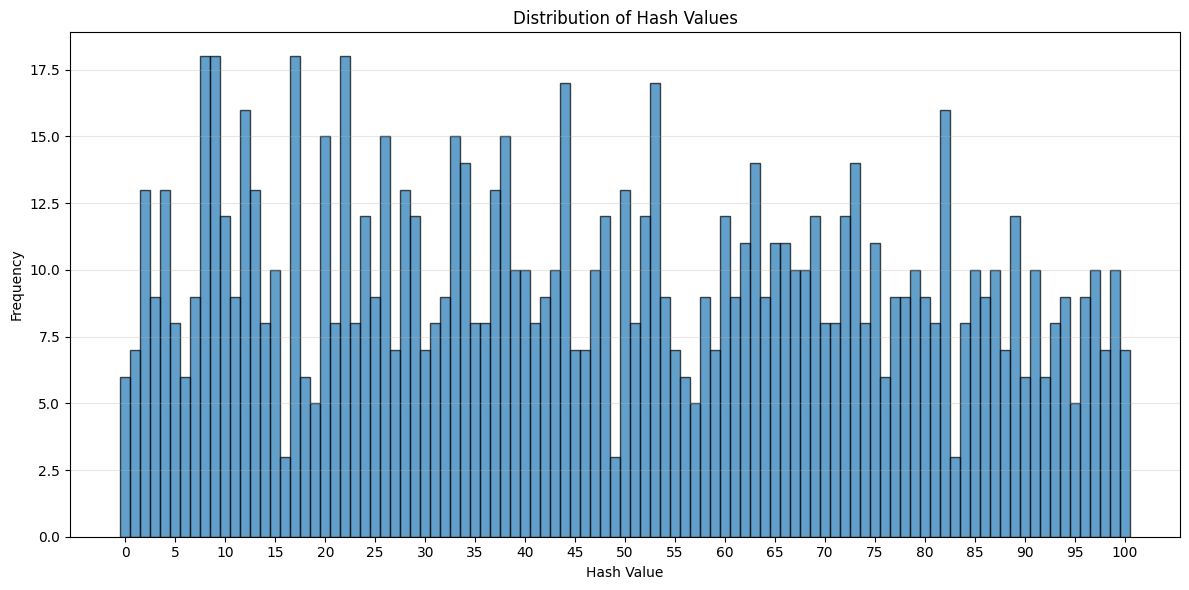

In [ ]:
"""The visualization shows how well the hash values are distributed across the available range, which relates 
    directly to the efficiency of the hash function.
"""
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
plt.hist(hashes, bins=np.arange(0, 102) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Hash Values')
plt.xlabel('Hash Value')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Limitations**

This hash function has several limitations:
- The small range(0-100) means collisions are inevitable with larger input sets
- The alogorithm is simple and doesnt cause the small changes in input causing large changes in output.
- For very long strings, integer overflow might be a concern in languages with fixed-size integers.

**Real-world Applications**

This hash function was designed for hash tables in C programs where:
- Speed is more important than cryptographic security
- The data set size is relatively small compared to the hash table size
- A simple implementation is preferred over complex algorithms.

# Task 3: SHA256 Padding


In [ ]:
"""
    Calculate the SHA-256 padding that would be applied to a file.
    
    Args:
        file_path (str): Path to the file to calculate padding for
        
    Returns:
        bytes: The padding that would be applied to the file
        
    According to FIPS 180-4 (Secure Hash Standard), the padding consists of:
    1. A '1' bit
    2. Enough '0' bits so the total message length in bits is congruent to 448 modulo 512
    3. The original message length as a 64-bit big-endian integer
    """
def calculate_sha256_padding(file_path):
    # Read the file contents
    try:
        with open(file_path, 'rb') as file:
            content = file.read()
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except Exception as e:
        print(f"Error reading file: {e}")
        return None
    
    # Calculate the length of the original message in bits
    original_length_bits = len(content) * 8

    # Calculate the padding
    # Start with the mandatory '1' bit (as a byte 0x80 = binary 10000000)
    padding = bytearray([0x80])

    # Calculate how many zero bytes we need
    # We need the final message length to be a multiple of 512 bits (64 bytes)
    # The last 8 bytes are reserved for the length field
    # So we need: original_length + 1 + padding_zeros + 8 ≡ 0 (mod 64)
    # Therefore: padding_zeros = 64 - ((original_length + 1 + 8) % 64)
    # If the result is 64, we set it to 0 (already a multiple of 64)
    padding_zeros = 56 - (len(content) + 1) % 64 # 56 = 64 - 8
    if padding_zeros < 0:
        padding_zeros += 64 # Ensure positive 
    
    # Add the zero bytes
    padding.extend([0] * padding_zeros)

    # Add the original length as a 64-bit big-endian integer
    # Convert original length to 8 bytes (64 bits)
    length_bytes = original_length_bits.to_bytes(8, byteorder='big')
    padding.extend(length_bytes)

    return bytes(padding)



In [ ]:
"""
    Print the padding bytes in hexadecimal format, with 26 bytes per line.
    
    Args:
        padding (bytes): The padding bytes to print
"""
def print_padding_hex(padding):
    if padding is None:
        return
    
    # Format each byte as a two-character hex string (e.g., '80' for byte 128)
    hex_values = [f"{b:02X}" for b in padding]
    
    # Print 26 bytes per line as in the example
    line_length = 26
    for i in range(0, len(hex_values), line_length):
        line = hex_values[i:i+line_length]
        print(" ".join(line))

In [ ]:
# Calculate and print the padding
print("SHA-256 padding for a file containing 'abc':")
padding = calculate_sha256_padding('./temp.txt')
print_padding_hex(padding)


SHA-256 padding for a file containing 'abc':
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 18

Verification of the expected output:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 18

Padding matches expected output: True
